In [16]:
import pandas as pd
import gdown
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Download file from google drive

In [14]:
file_id = '1T-nWdDdnjNWHjuwHvFaTQqlQ8ewz9hYI'
url = f"https://drive.google.com/uc?id={file_id}"

output = 'pregnancy_test_data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1T-nWdDdnjNWHjuwHvFaTQqlQ8ewz9hYI
To: c:\Users\vladi\Gleb Michailov\AB test\pregnancy_test_data.csv
100%|██████████| 60.0k/60.0k [00:00<00:00, 698kB/s]


'pregnancy_test_data.csv'

In [51]:
df = pd.read_csv(output)
df.head(5)

,y_true,y_pred1,y_pred2
0,0,0,0
1,1,1,1
2,1,1,1
3,0,1,0
4,1,1,1


# Sensitivity and specificity as functions

In [52]:
sens_first_test = recall_score(df['y_true'], df['y_pred1'])
print(f"Sensitivity of the first test: {sens_first_test}")

Sensitivity of the first test: 0.9901671583087512


In [53]:
sens_second_test = recall_score(df['y_true'], df['y_pred2'])
print(f"Sensitivity of the second test: {sens_second_test}")

Sensitivity of the second test: 0.9508357915437562


In [54]:
spec_first_test = recall_score(df['y_true'], df['y_pred1'], pos_label=0)
print(f"Specificity of the first test: {spec_first_test}") 

Specificity of the first test: 0.9084435401831129


In [55]:
spec_second_test = recall_score(df['y_true'], df['y_pred2'], pos_label=0)
print(f"Specificity of the second test: {spec_second_test}")

Specificity of the second test: 0.9491353001017294


# Another way to get sensitivity and specificity

In [56]:
df['accuracy1'] = df['y_true'] == df['y_pred1']
df['accuracy1'] = df['accuracy1'].astype(float)

In [57]:
df['accuracy2'] = df['y_true'] == df['y_pred2']
df['accuracy2'] = df['accuracy2'].astype(float)

In [61]:
sens_and_spec = round(df.groupby('y_true')[['accuracy1', 'accuracy2']].mean(),2)
sens_and_spec

,accuracy1,accuracy2
y_true,,
0,0.91,0.95
1,0.99,0.95


# Confusion matrix

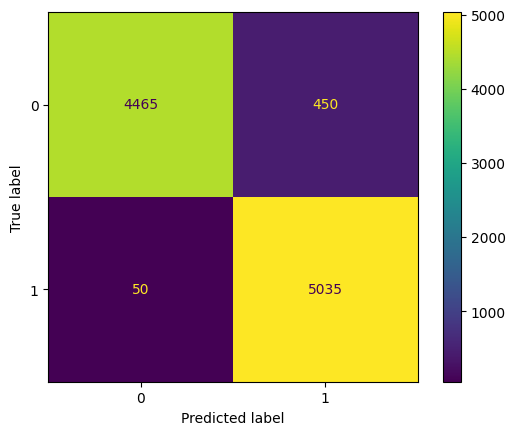

In [23]:
cm = confusion_matrix(df['y_true'], df['y_pred1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

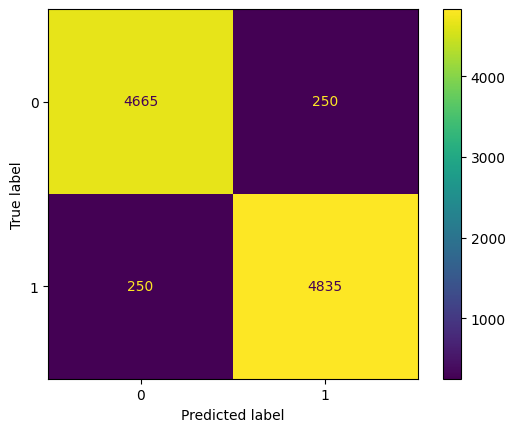

In [24]:
cm = confusion_matrix(df['y_true'], df['y_pred2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();